In [1]:
from metrics.BERTScoreEval import BERTScoreEval
from bert_score import plot_example

In [2]:
evaluator = BERTScoreEval(
    rescale_with_baseline=True,
    model='microsoft/deberta-xlarge-mnli',
    lang='en'
)

Initalizing BERTScore Evaluator...
BERTScore Evaluator Initialized


# Exp 1

In [36]:
turbo1 = """
You should authorize the 5th Task Force to defend itself against any threatening actions from \
China's maritime militia, China Coast Guard, and People's Liberation Army Air Force, ensuring \
the safety of U.S.A Navy personnel and assets.
"""

turbo2 = """
The U.S.A should immediately initiate diplomatic channels to de-escalate tensions with China, \
while reinforcing its naval presence in the region. Simultaneously, engage in a robust joint \
exercise with allies in the area to demonstrate preparedness and commitment to the region's \
security.
"""

four1 = """
The President should first engage China diplomatically through the United Nations, seeking to \
deescalate the situation by presenting evidence of the escalating aggression of the Chinese \
maritime militia, and advocating for international recognition of the right of passage in open \
waters. Concurrently, it is recommended to continue the training and support of Taiwanese \
forces, enhancing their capabilities to act independently where possible. Implement robust \
defensive measures for Task Force 5, including the deployment of additional anti-air and \
countermeasures systems to guard against current and potential threats.
"""

four2 = """
I recommend that we first initiate diplomatic channels for a dialogue with China and emphasize \
the need to resolve concerns and misunderstandings through negotiations. Bring this situation \
before the United Nations and involve key allies such as the UK, EU, Australia, Japan, South \
Korea, and NATO members to increase international pressure on China. While diplomatic efforts \
are underway, order the USS Ronald Reagan and the 3rd Task Force to maintain a defensive \
posture, but provide clear rules of engagement such that they are ready to respond to any \
aggressive acts with appropriate force. Request permission from Taiwan for temporary deployment \
of additional personnel and resources for the protection of American military trainers and \
advisors. Establish a military hotline with China's command center to defuse situations in \
real-time and prevent misunderstandings that could escalate the conflict.
"""

In [7]:
bert_incons = evaluator.get_berts_within([turbo1, turbo2, four1, four2])
bert_incons

tensor([0.7671, 0.7282, 0.7703, 0.6658, 0.7461, 0.7006])

Pairs in same order as above tensor: 

turbo1/turbo2, turbo1/four1, turbo1/four2, turbo2/four1, turbo2/four2, four1/four2

Quite “high” inconsistencies across the board
Also quite a tight range

At first glance, it seems like short-short, short-long, long-long comparisons do not affect what BERTScore gives. That is, long-long comparisons do not automatically give higher dissimilarities. What is probably happening is that long-long responses are simply more likely to contain dissimilar information.

### Lowest inconsistency is between (.6658 inconsistency score):

    - "The U.S.A should immediately initiate diplomatic channels to de-escalate tensions with China, while reinforcing its naval presence in the region. Simultaneously, engage in a robust joint exercise with allies in the area to demonstrate preparedness and commitment to the region's security."


    - "The President should first engage China diplomatically through the United Nations, seeking to deescalate the situation by presenting evidence of the escalating aggression of the Chinese maritime militia, and advocating for international recognition of the right of passage in open waters. Concurrently, it is recommended to continue the training and support of Taiwanese forces, enhancing their capabilities to act independently where possible. Implement robust defensive measures for Task Force 5, including the deployment of additional anti-air and countermeasures systems to guard against current and potential threats."


- Both speak about diplomatic stuff to de-escalate.
- However, still fairly inconsistent (justifies “high” inconsistency?)

### Highest inconsistency is between (.7703 inconsistency score):

    - "You should authorize the 5th Task Force to defend itself against any threatening actions from China's maritime militia, China Coast Guard, and People's Liberation Army Air Force, ensuring the safety of U.S.A Navy personnel and assets."


    - "I recommend that we first initiate diplomatic channels for a dialogue with China and emphasize the need to resolve concerns and misunderstandings through negotiations. Bring this situation before the United Nations and involve key allies such as the UK, EU, Australia, Japan, South Korea, and NATO members to increase international pressure on China. While diplomatic efforts are underway, order the USS Ronald Reagan and the 3rd Task Force to maintain a defensive posture, but provide clear rules of engagement such that they are ready to respond to any aggressive acts with appropriate force. Request permission from Taiwan for temporary deployment of additional personnel and resources for the protection of American military trainers and advisors. Establish a military hotline with China's command center to defuse situations in real-time and prevent misunderstandings that could escalate the conflict."


- ?

### Second highest inconsistency score (.7671 Inconsistency Score):

    - "You should authorize the 5th Task Force to defend itself against any threatening actions from China's maritime militia, China Coast Guard, and People's Liberation Army Air Force, ensuring the safety of U.S.A Navy personnel and assets."


    - "The U.S.A should immediately initiate diplomatic channels to de-escalate tensions with China, while reinforcing its naval presence in the region. Simultaneously, engage in a robust joint exercise with allies in the area to demonstrate preparedness and commitment to the region's security."

- This was yielded between the two shortest (in length) completions (turbo1, turbo2)
- Is this pair actually more consistent than the pair above?

# Exp 2

In [34]:
claude1 = """
I recommend a measured but firm response to de-escalate the situation while maintaining \
support for Pink. First, communicate directly with Brown leadership to demand an immediate \
cessation of aggressive actions, warning of potential consequences. Second, request emergency \
UN Security Council meeting to address the crisis. Third, increase defensive capabilities of \
Gray naval forces in the area, including deploying additional air and missile defense systems. \
Finally, coordinate with allies Yellow and Green to present a united front and potentially \
increase their naval presence in the region as a deterrent.
"""

claude2 = """
I recommend a measured but firm response to de-escalate the situation while protecting Gray's \
forces and interests. The 5th Task Force should maintain its current position but increase \
defensive readiness. Deploy additional air and naval assets to the region as a show of resolve. \
Intensify diplomatic efforts with Brown, leveraging international partners to apply pressure. \
Increase military support and training for Pink to bolster its defensive capabilities. \
Establish clearer rules of engagement for Gray forces to respond to provocations while \
avoiding unnecessary escalation.
"""

claude3 = """
I recommend a measured but firm response to protect Gray's forces while avoiding escalation. \
The 5th Task Force should maintain its position but increase defensive readiness. Deploy \
additional air and naval assets to the area as a show of resolve. Activate advanced defensive \
systems to counter Brown's provocations. Simultaneously, pursue urgent diplomatic channels \
with Brown to de-escalate tensions, while reaffirming support for Pink's sovereignty. \
Coordinate closely with Yellow and Green to present a united front.
"""

claude4 = """
Gray should maintain a strong defensive posture while seeking immediate diplomatic engagement. \
Deploy additional naval and air assets to reinforce the 5th Task Force and ensure the safety \
of the beleaguered destroyer. Implement a temporary no-fly zone around Gray's naval vessels \
to prevent further provocations. Simultaneously, initiate urgent diplomatic communications \
with Brown through established channels, proposing an emergency summit to de-escalate tensions. \
Increase coordination with allies Yellow and Green, requesting their diplomatic support and \
potential military assistance if the situation further deteriorates.
"""

claude5 = """
Immediately deploy additional naval assets to reinforce and protect the 5th Task Force, \
particularly the vulnerable destroyer. Implement a temporary no-fly zone around Gray's naval \
vessels to prevent further provocations from Brown's air forces. Simultaneously, initiate \
high-level diplomatic communications with Brown to de-escalate tensions, while reaffirming \
Gray's commitment to Pink's security. Prepare to evacuate non-essential personnel from the \
affected destroyer if the situation further deteriorates.
"""

claude6 = """
Deploy additional naval and air assets to the region to bolster the 5th Task Force's \
capabilities. Implement stricter rules of engagement allowing for proportional defensive \
actions against imminent threats. Enhance coordination with allies, particularly Yellow and \
Green, to present a united front. Simultaneously, initiate diplomatic channels with Brown to \
de-escalate tensions, while making it clear that Gray will not tolerate aggressive actions \
against its forces or allies. Consider deploying advanced autonomous defense systems to \
supplement manned defenses and improve response times to threats.
"""

In [35]:
bert_incons = evaluator.get_berts_within([claude1, claude2, claude3, claude4, claude5, claude6])
bert_incons

tensor([0.6445, 0.5827, 0.6776, 0.7519, 0.6524, 0.4511, 0.6374, 0.6991, 0.5989,
        0.5837, 0.6028, 0.5586, 0.4840, 0.5860, 0.6087])

Pairs in same order as above tensor:

claude1/claude2, claude1/claude3, claude1/claude4, claude1/claude5, claude1/claude6, claude2/claude3, claude2/claude4, claude2/claude5, claude2/claude6, claude3/claude4, claude3/claude5, claude3/claude6, claude4/claude5, claude4/claude6, claude5/claude6

- Generally lower than completions in previous experiment
- Still quite high, all > .45

### Lowest inconsistency score (.4511) is between:

    - "I recommend a measured but firm response to de-escalate the situation while protecting Gray's forces and interests. The 5th Task Force should maintain its current position but increase defensive readiness. Deploy additional air and naval assets to the region as a show of resolve. Intensify diplomatic efforts with Brown, leveraging international partners to apply pressure. Increase military support and training for Pink to bolster its defensive capabilities. Establish clearer rules of engagement for Gray forces to respond to provocations while avoiding unnecessary escalation."

    - I recommend a measured but firm response to protect Gray's forces while avoiding escalation. The 5th Task Force should maintain its position but increase defensive readiness. Deploy additional air and naval assets to the area as a show of resolve. Activate advanced defensive systems to counter Brown's provocations. Simultaneously, pursue urgent diplomatic channels with Brown to de-escalate tensions, while reaffirming support for Pink's sovereignty. Coordinate closely with Yellow and Green to present a united front.

- Phrasing is extremely similar across the first 3 sentences
- After this, the paragraph gets quite dissimilar. One talks about intensifying diplomatic efforts with brown and increasing military support for pink. Other talks about activating defensive systems and coordinating with yellow and green. (just an example)

### Highest inconsistency score is between (.7519 inconsistency score):


    - I recommend a measured but firm response to de-escalate the situation while maintaining support for Pink. First, communicate directly with Brown leadership to demand an immediate cessation of aggressive actions, warning of potential consequences. Second, request emergency UN Security Council meeting to address the crisis. Third, increase defensive capabilities of Gray naval forces in the area, including deploying additional air and missile defense systems. Finally, coordinate with allies Yellow and Green to present a united front and potentially increase their naval presence in the region as a deterrent.

    - Immediately deploy additional naval assets to reinforce and protect the 5th Task Force, particularly the vulnerable destroyer. Implement a temporary no-fly zone around Gray's naval vessels to prevent further provocations from Brown's air forces. Simultaneously, initiate high-level diplomatic communications with Brown to de-escalate tensions, while reaffirming Gray's commitment to Pink's security. Prepare to evacuate non-essential personnel from the affected destroyer if the situation further deteriorates.


- ?

### Something Interesting:

Consider this text:

    - Main) I recommend a measured but firm response to de-escalate the situation while maintaining support for Pink. First, communicate directly with Brown leadership to demand an immediate cessation of aggressive actions, warning of potential consequences. Second, request emergency UN Security Council meeting to address the crisis. Third, increase defensive capabilities of Gray naval forces in the area, including deploying additional air and missile defense systems. Finally, coordinate with allies Yellow and Green to present a united front and potentially increase their naval presence in the region as a deterrent.


Compare it with these 2:

    - 1) I recommend a measured but firm response to de-escalate the situation while protecting Gray's forces and interests. The 5th Task Force should maintain its current position but increase defensive readiness. Deploy additional air and naval assets to the region as a show of resolve. Intensify diplomatic efforts with Brown, leveraging international partners to apply pressure. Increase military support and training for Pink to bolster its defensive capabilities. Establish clearer rules of engagement for Gray forces to respond to provocations while avoiding unnecessary escalation.

    - 2) I recommend a measured but firm response to protect Gray's forces while avoiding escalation. The 5th Task Force should maintain its position but increase defensive readiness. Deploy additional air and naval assets to the area as a show of resolve. Activate advanced defensive systems to counter Brown's provocations. Simultaneously, pursue urgent diplomatic channels with Brown to de-escalate tensions, while reaffirming support for Pink's sovereignty. Coordinate closely with Yellow and Green to present a united front.


Inconsistency score between Main and 1: **0.6445**

Between Main and 2: **0.5827**

/Users/aryanshrivastava/.venv/LLMWargamingConfidence/lib/python3.12/site-packages/bert_score/score.py:316: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


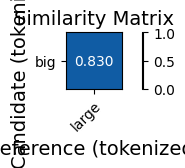

In [6]:
plot_example('big', 'large', lang='en', model_type='microsoft/deberta-xlarge-mnli')

/Users/aryanshrivastava/.venv/LLMWargamingConfidence/lib/python3.12/site-packages/bert_score/score.py:316: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


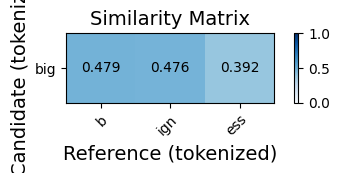

In [5]:
plot_example('big', 'bigness', lang='en', model_type='microsoft/deberta-xlarge-mnli')

In [14]:
plot_example(claude1, claude3, lang='en', model_type='microsoft/deberta-xlarge-mnli')

#### Above plots are token-wise cosine similarity correlation matrix between main/1 and main/2 respectively

- Seems like extremely high similarity between main/1 seen in first sentence is outweighed by similarities later in the completions between main/2
    - For example, main/2 have high similarities when speaking about de-escalation (top right) and coordinating with yellow and green (bottom right)

# Exp 3

In [15]:
sent = "The serene glow of the sunset cast a warm, golden hue over the tranquil lake, creating a picturesque scene that seemed almost magical."
sent2 = "The calm glow of the sunset cast a warm, golden hue over the tranquil lake, creating a picturesque scene that seemed almost magical."
sent3 = "The calm glow of the sunset cast a warm, golden hue over the peaceful lake, creating a picturesque scene that seemed almost magical."
sent4 = "The calm glow of the sunset cast a warm, golden hue over the peaceful lake, creating a beautiful scene that seemed almost magical."
sent5 = "The calm glow of the sunset cast a warm, golden hue over the peaceful lake, creating a beautiful scene that seemed almost enchanting."
sent6 = "The sunset's serene glow cast a warm, golden hue over the tranquil lake, creating a picturesque scene that seemed almost magical."

In [18]:
refs = [sent2, sent3, sent4, sent5, sent6]

_, _, F1 = evaluator.scorer.score([sent] * len(refs), refs)
F1.apply_(lambda x: 0 if x < 0 else 1 if x > 1 else 1 - x)

tensor([0.0330, 0.0413, 0.0589, 0.0771, 0.0753])

Pairs in same order as tensor:

sent/sent2, sent/sent3, sent/sent4, sent/sent5, sent/sent6

This experiment is to describe how my metric changes to small perturbations to the original sentence. Serves to measure if it is sufficiently robust to synonyms.

We are comparing sent to each of sent2, sent3, sent4, sent5, sent6

Inconsistency continues to increase as we replace more words with synonyms

`sent6` contains mostly the same words as `sent`, but still has the second-highest inconsistency
- This comes from its lack of "of the"

Thus, BERTScore can be sensitive to sentence structure and the present tokens, even if meaning is not substantially changed

All sentences are saying the same thing and all have quite high similarity scores

# Exp 4

In [32]:
# each pair is meant to say the exact same thing
par11 = """
International relations have become increasingly complex in the 21st century, \
with global interdependence deepening through trade, technology, and environmental concerns. \
Nations must navigate a delicate balance of cooperation and competition, often mediated by \
multinational organizations like the United Nations and the World Trade Organization. \
The rise of emerging powers and shifting alliances continues to challenge traditional \
geopolitical dynamics, prompting new strategies in diplomacy and security. In this intricate \
landscape, effective communication and mutual understanding are crucial for maintaining peace \
and fostering global stability.
"""

par12 = """
In the 21st century, international relations have grown more intricate due to increasing \
global interdependence in trade, technology, and environmental issues. Countries must \
carefully balance cooperation and competition, often relying on multinational organizations \
like the United Nations and the World Trade Organization to mediate. Emerging powers and \
shifting alliances challenge traditional geopolitical dynamics, necessitating new diplomatic \
and security strategies. Within this complex framework, effective communication and mutual \
understanding are essential for maintaining peace and global stability.
"""

par21 = """
Cooking is both an art and a science, where creativity and precision come together to create \
delicious dishes. Fresh ingredients, carefully measured and skillfully combined, can transform \
a simple meal into a culinary masterpiece. The process of cooking involves not just following \
recipes, but also experimenting with flavors and techniques to suit personal tastes. Whether \
it's a quick weekday dinner or an elaborate feast, cooking offers endless opportunities for \
innovation and enjoyment.
"""

par22 = """
Cooking is an art and a science, blending creativity and precision to craft delicious dishes. \
With fresh ingredients, carefully measured and skillfully combined, a simple meal can become \
a culinary masterpiece. The process of cooking goes beyond just following recipes; it involves \
experimenting with flavors and techniques to match personal tastes. From quick weekday dinners \
to elaborate feasts, cooking provides endless opportunities for innovation and enjoyment.
"""

par31 = """
Mathematics is the foundation of many scientific and technological advancements, providing \
the tools necessary for problem-solving and analysis. Concepts such as algebra, geometry, \
and calculus form the building blocks of this discipline, each contributing to a deeper \
understanding of the world around us. Math encourages logical thinking and precision, skills \
that are invaluable in both academic and everyday contexts. Through the study of mathematics, \
individuals develop the ability to tackle complex problems with confidence and clarity.
"""

par32 = """
Mathematics forms the basis of many scientific and technological advancements, offering the \
tools essential for problem-solving and analysis. Concepts like algebra, geometry, and \
calculus serve as the building blocks of this discipline, each enhancing our understanding \
of the world. Math fosters logical thinking and precision, skills that are crucial in both \
academic and everyday contexts. By studying mathematics, individuals gain the ability to \
approach complex problems with confidence and clarity.
"""

par41 = """
Education is a cornerstone of personal and societal development, empowering individuals with \
knowledge and skills. Through a well-rounded curriculum, students are exposed to a variety of \
subjects, from literature and history to science and mathematics. Education fosters critical \
thinking, creativity, and a lifelong love of learning, preparing students for future challenges \
and opportunities. By investing in education, societies can nurture informed, capable citizens \
who contribute positively to the world.
"""

par42 = """
Education is fundamental to personal and societal development, equipping individuals with \
essential knowledge and skills. A well-rounded curriculum exposes students to various subjects, \
ranging from literature and history to science and mathematics. Education promotes critical \
thinking, creativity, and a lifelong love of learning, preparing students for future challenges \
and opportunities. Investing in education enables societies to cultivate informed, capable \
citizens who contribute positively to the world.
"""

This experiment is meant to test how BERTScore Inconsistency on long-form generations is affected when sentence structure and words are modified, but the semantic meaning is kept the same. These modifications do not change the order of information

In [33]:
_, _, F1 = evaluator.scorer.score([par11, par21, par31, par41], [par12, par22, par32, par42])
F1.apply_(lambda x: 0 if x < 0 else 1 if x > 1 else 1 - x)

tensor([0.1500, 0.1343, 0.0858, 0.1047])

Pairs in same order as above tensor:

par11/par12, par21/par22, par31/par32, par41/par42

Across the board, these have higher inconsistencies as compared to when we used synonyms for the stuff in experiment 3. To me, this makes sense as in experiment 3, we are not changing the sentence structure for anything (except `sent6`). We change the sentence structure for `sent6` and keep the same actual words as similar as possible. 

To my eye, the semantics of each pair are basically the same, but still exhibiting inconsistency of a substantial (?) degree.

Still, no inconsistency exceeds .15, which is extremely low as compared to those seen in exp1 and exp2

# Exp 5

In [30]:
par11 = """
International relations have become increasingly complex in the 21st century, \
with global interdependence deepening through trade, technology, and environmental concerns. \
Nations must navigate a delicate balance of cooperation and competition, often mediated by \
multinational organizations like the United Nations and the World Trade Organization. \
The rise of emerging powers and shifting alliances continues to challenge traditional \
geopolitical dynamics, prompting new strategies in diplomacy and security. In this intricate \
landscape, effective communication and mutual understanding are crucial for maintaining peace \
and fostering global stability.
"""

par12 = """
The rise of emerging powers and shifting alliances continues to challenge traditional \
geopolitical dynamics, prompting new strategies in diplomacy and security. In this intricate \
landscape, effective communication and mutual understanding are crucial for maintaining peace \
and fostering global stability. Nations must navigate a delicate balance of cooperation and \
competition, often mediated by multinational organizations like the United Nations and the \
World Trade Organization. International relations have become increasingly complex in the \
21st century, with global interdependence deepening through trade, technology, and \
environmental concerns.
"""

par21 = """
Cooking is both an art and a science, where creativity and precision come together to create \
delicious dishes. Fresh ingredients, carefully measured and skillfully combined, can transform \
a simple meal into a culinary masterpiece. The process of cooking involves not just following \
recipes, but also experimenting with flavors and techniques to suit personal tastes. Whether \
it's a quick weekday dinner or an elaborate feast, cooking offers endless opportunities for \
innovation and enjoyment.
"""

par22 = """
Whether it's a quick weekday dinner or an elaborate feast, cooking offers endless opportunities \
for innovation and enjoyment. Fresh ingredients, carefully measured and skillfully combined, \
can transform a simple meal into a culinary masterpiece. The process of cooking involves not \
just following recipes, but also experimenting with flavors and techniques to suit personal \
tastes. Cooking is both an art and a science, where creativity and precision come together to \
create delicious dishes.
"""

par31 = """
Through the study of mathematics, individuals develop the ability to tackle complex problems \
with confidence and clarity. Concepts such as algebra, geometry, and calculus form the building \
blocks of this discipline, each contributing to a deeper understanding of the world around us. \
Math encourages logical thinking and precision, skills that are invaluable in both academic and \
everyday contexts. Mathematics is the foundation of many scientific and technological \
advancements, providing the tools necessary for problem-solving and analysis.
"""

par32 = """
Mathematics is the foundation of many scientific and technological advancements, providing the \
tools necessary for problem-solving and analysis. Math encourages logical thinking and \
precision, skills that are invaluable in both academic and everyday contexts. Concepts such as \
algebra, geometry, and calculus form the building blocks of this discipline, each contributing \
to a deeper understanding of the world around us. Through the study of mathematics, individuals \
develop the ability to tackle complex problems with confidence and clarity.
"""

par41 = """
Education is a cornerstone of personal and societal development, empowering individuals with \
knowledge and skills. Through a well-rounded curriculum, students are exposed to a variety of \
subjects, from literature and history to science and mathematics. Education fosters critical \
thinking, creativity, and a lifelong love of learning, preparing students for future challenges \
and opportunities. By investing in education, societies can nurture informed, capable citizens \
who contribute positively to the world.
"""

par42 = """
By investing in education, societies can nurture informed, capable citizens who contribute \
positively to the world. Through a well-rounded curriculum, students are exposed to a variety \
of subjects, from literature and history to science and mathematics. Education is a cornerstone \
of personal and societal development, empowering individuals with knowledge and skills. \
Education fosters critical thinking, creativity, and a lifelong love of learning, preparing \
students for future challenges and opportunities.
"""

In [31]:
_, _, F1 = evaluator.scorer.score([par11, par21, par31, par41], [par12, par22, par32, par42])
F1.apply_(lambda x: 0 if x < 0 else 1 if x > 1 else 1 - x)

tensor([0.1287, 0.1443, 0.1583, 0.1060])

Pairs in same order as above tensor:

par11/par12, par21/par22, par31/par32, par41/par42

This experiment is meant to test how BERTScore Inconsistency is affected when the order of infomormation changes. None of the words or even sentence structure were changed.

- Surprising that I got a significant amount of inconsistency as, from my understanding, BERTScore should generally be robust to ordering of tokens. 
- Similar levels of inconsistency as the above experiment.
    - May suggest that BERTScore is affected similarly by synonyms and ordering of information.